# Exploratory Data Analysis (EDA)

## Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import zipfile

### steam-200k Dataset

#### Import Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#### Unzip steam-200k Dataset

In [7]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/steam-200k.csv.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

#### steam-200k

In [8]:
steam_df = pd.read_csv("/tmp/steam-200k.csv")

In [11]:
steam_df

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


#### Renaming the columns

In [13]:
steam_df = steam_df.rename(columns={"151603712": "User ID", "The Elder Scrolls V Skyrim": "Name of the steam game", "purchase": "behavior name (purchase/play)", "1.0": "Hours if behavior is play, 1.0 if behavior is purchase"})
steam_df.head(5)

,User ID,Name of the steam game,behavior name (purchase/play),"Hours if behavior is play, 1.0 if behavior is purchase",0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


#### Dropping irrelevant columns

In [14]:
steam_df = steam_df.drop(['Hours if behavior is play, 1.0 if behavior is purchase', '0'], axis=1)
steam_df.head(5)

,User ID,Name of the steam game,behavior name (purchase/play)
0,151603712,The Elder Scrolls V Skyrim,play
1,151603712,Fallout 4,purchase
2,151603712,Fallout 4,play
3,151603712,Spore,purchase
4,151603712,Spore,play


#### Dropping the duplicate rows

In [15]:
steam_df.shape

(199999, 3)

In [16]:
duplicate_rows_steam_df = steam_df[steam_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_steam_df.shape)

number of duplicate rows:  (719, 3)


In [17]:
steam_df.count()

User ID                          199999
Name of the steam game           199999
behavior name (purchase/play)    199999
dtype: int64

In [20]:
steam_df = steam_df.drop_duplicates()
steam_df.shape

(199280, 3)

In [22]:
steam_df.count()

User ID                          199280
Name of the steam game           199280
behavior name (purchase/play)    199280
dtype: int64

#### Identify missing values

In [28]:
print(steam_df.isnull().sum())

User ID                          0
Name of the steam game           0
behavior name (purchase/play)    0
dtype: int64


## Data Visualisation

#### Import Modules

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns 


%matplotlib inline 

#### Bar Plot

In [31]:
steam_df['behavior name (purchase/play)'].value_counts()

purchase    128803
play         70477
Name: behavior name (purchase/play), dtype: int64

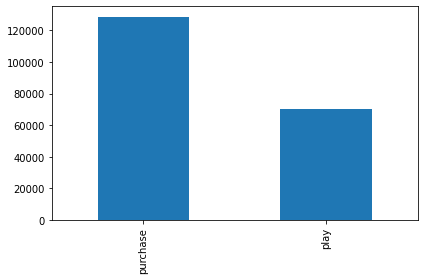

In [32]:
steam_df['behavior name (purchase/play)'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

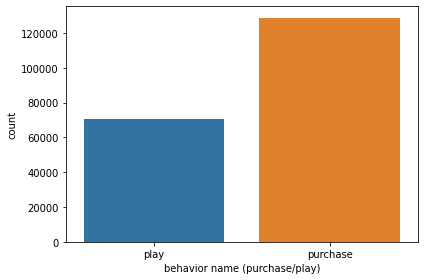

In [33]:
sns.countplot(data=steam_df, x='behavior name (purchase/play)')
plt.tight_layout()

#### Pie Chart

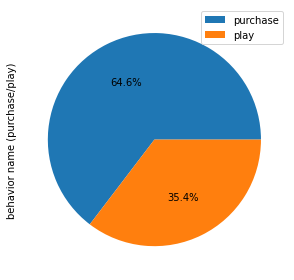

In [34]:
steam_df['behavior name (purchase/play)'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

#### Histogram

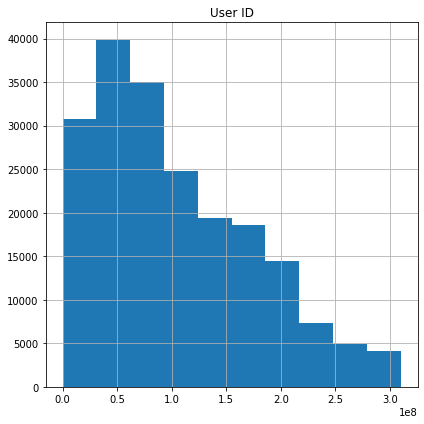

In [35]:
steam_df.hist(figsize=(6,6), bins=10)
plt.tight_layout()